# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [4]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset(Diabetes.csv)

In [5]:
df = pd.read_csv('C:/Users/simon/ml-project-supervised-learning/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Check if there are missing values:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


-  From the above statistical summary the Average age(Mean) is **33.240885**

- Average Glucose with Diabetes =  **141.25746268656715**
- Average Glucose without Diabetes =  **109.98**

In [8]:
# Average Glucose of individuals with diabetes & without diabetes
Ave_glu_diabetes = df[df['Outcome'] == 1]['Glucose'].mean()
Ave_glu_negative = df[df['Outcome'] == 0]['Glucose'].mean()

# Average BMI of individuals with diabetes & without diabetes
Ave_bmi_diabetes = df[df['Outcome'] == 1]['BMI'].mean()
Ave_bmi_negative = df[df['Outcome'] == 0]['BMI'].mean()

print(" Average Glucose with Diabetes " "= ", Ave_glu_diabetes)
print(" Average Glucose without Diabetes " "= ", Ave_glu_negative)
print(" Average BMI with Diabetes " "= ", Ave_bmi_diabetes)
print(" Average BMI without Diabetes " "= ", Ave_bmi_negative)


 Average Glucose with Diabetes =  141.25746268656715
 Average Glucose without Diabetes =  109.98
 Average BMI with Diabetes =  35.14253731343284
 Average BMI without Diabetes =  30.3042


- Distribution of each preditor variables:

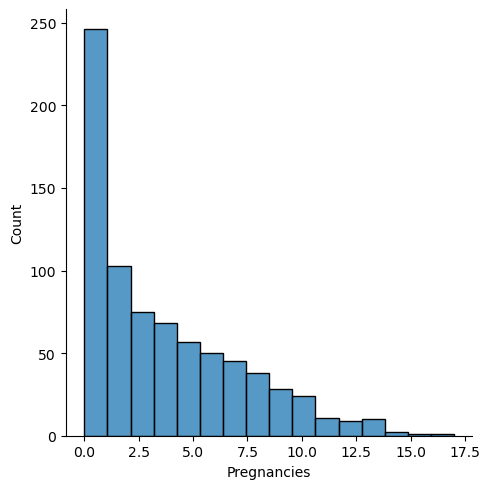

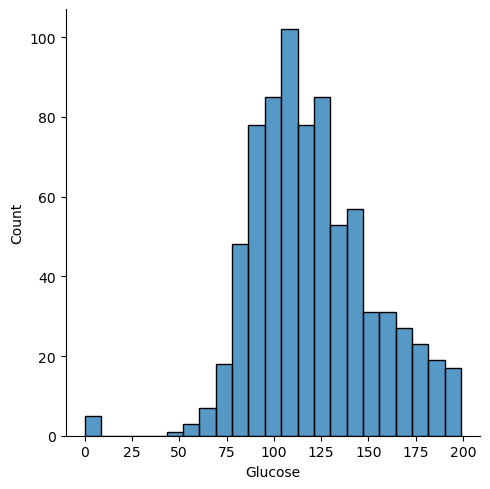

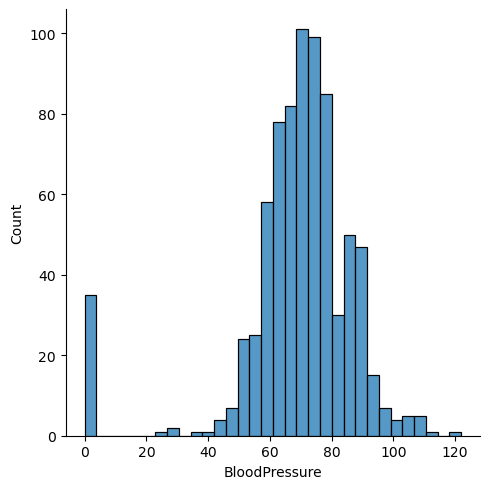

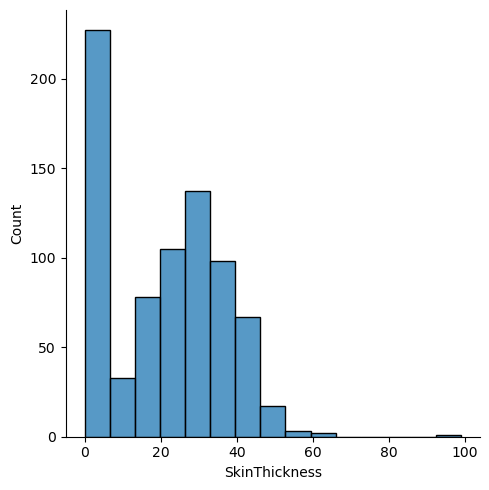

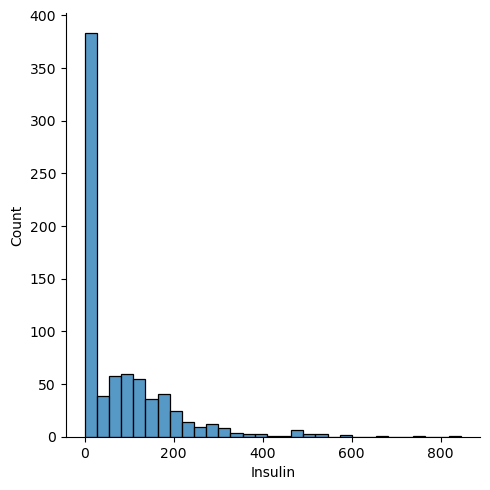

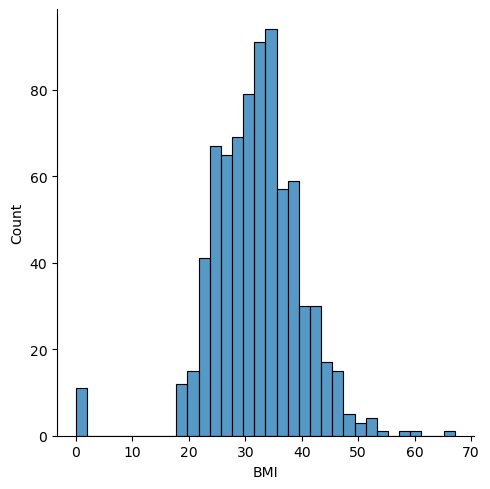

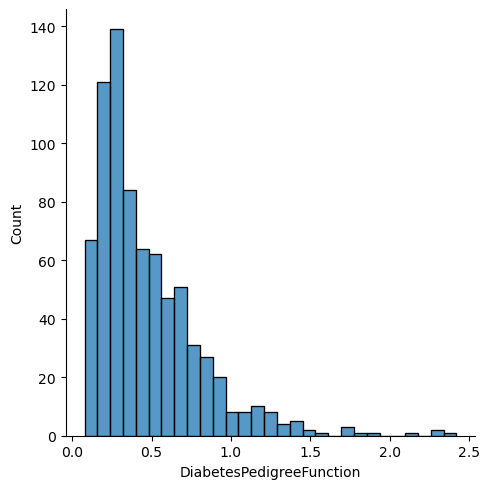

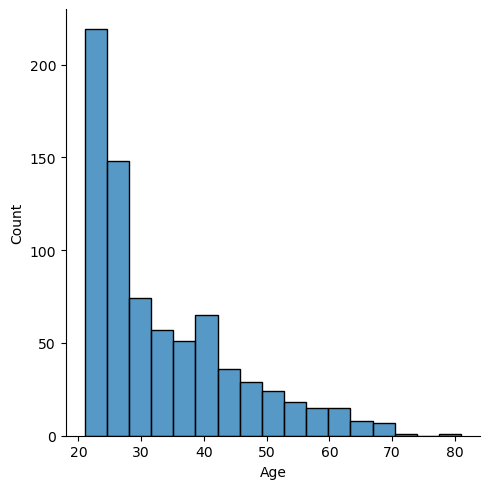

In [9]:
Pred_var = df.drop(columns=['Outcome'])

for column in Pred_var:
    sns.displot(Pred_var[column])


- From the above distribution we can see that **Pregnancies, Insulin, 
DiabetesPedigreeFunction and Age** are skewed.

- We can also notice an outlier in **BMI, BloodPressure & Glucose**.

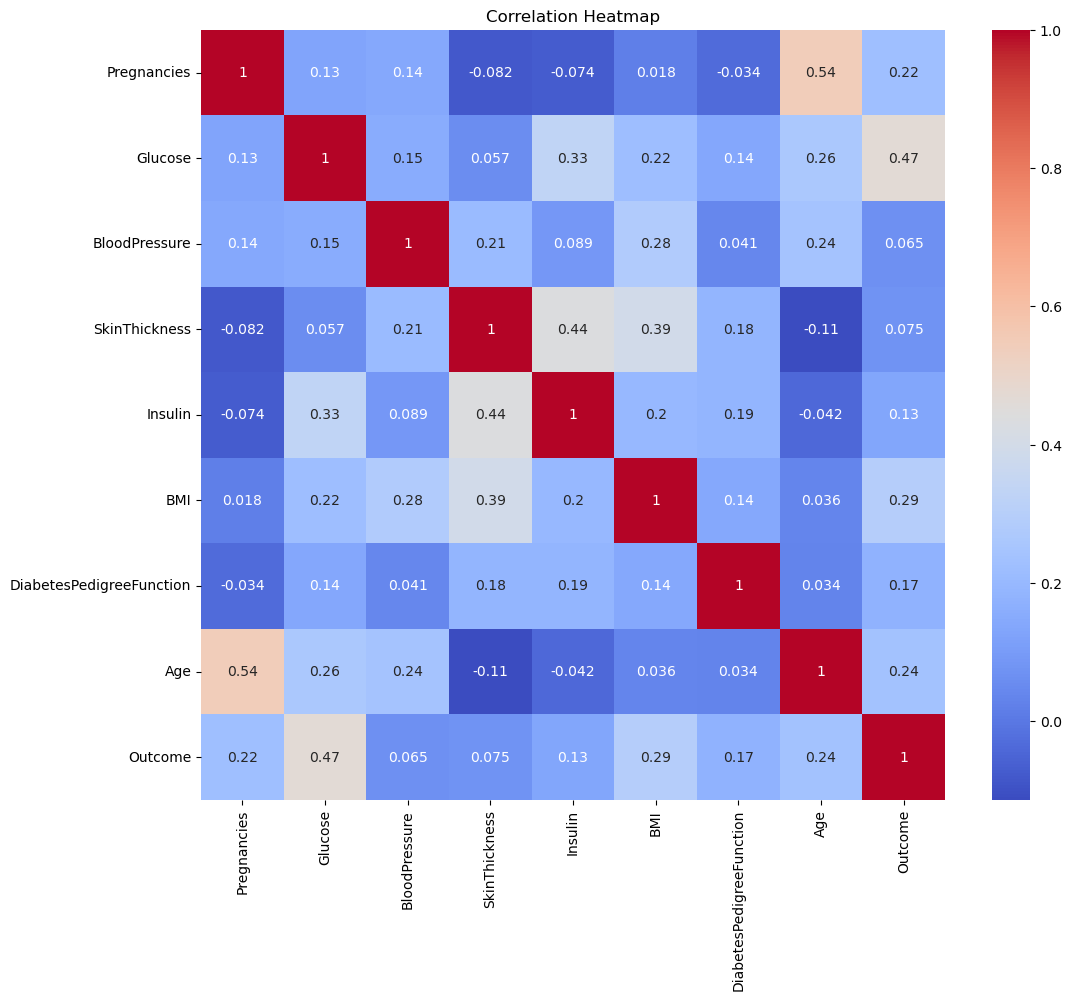

In [10]:
# Using a heatmap to observe the correlations between various predictor variables and also predictor & outcome.
corr_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

- Looking the heatmap the only correlations that we can consider are the correlations between **outcome**  and **Glucose** and  also the correlation between **Age** & **pregnacies**.

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

        - No missing values in the dataset
        - Outliers are not significant enough.

### Scaling Dataset

In [11]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(Pred_var), columns=Pred_var.columns)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


- Because of the zeros and -ve values in the dataset could not do logarithmic transformation(as part of feature engineering.

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [20]:
# Suppress some warnings that sklearn is returning when a model doesn't perform well
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import warnings
warnings.filterwarnings('ignore')

In [22]:
#Defining x, y variables for building model
from sklearn.utils import shuffle

X, y = df_scaled, df['Outcome']

# It is good practice to shuffle your data, since it
# may be ordered in a particular way (e.g. increasing target)
X, y = shuffle(X, y, random_state=27)

print(f'Dataset has {X.shape[0]} data points and {X.shape[1]} features')

Dataset has 768 data points and 8 features


In [24]:
# Splitting data in to train/test
from sklearn.model_selection import train_test_split
train_ratio = 0.70
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, train_size=train_ratio) #shuffle is False because we shuffled above

print(f'{len(X_train)} training samples and {len(X_test)} test samples')

537 training samples and 231 test samples


### Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
# Train our model
# logistic regression with no penalty term in the cost function.
log_model = LogisticRegression(penalty='none') 

log_model.fit(X_train, y_train)

#Make Prediction using the Test data:
log_pred = log_model.predict(X_test)



In [42]:
#Evaluating the Logistics Regression model Using accuracy, precision, recall & F1-score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy Metrics
accuracy = accuracy_score(y_test, log_pred)
print("Accuracy:", accuracy)

#Precision Metrics
precision = precision_score(y_test, log_pred)
print("Precision:", precision)

#F1- Metrics
f1 = f1_score(y_test, log_pred)
print("F1-Score:", f1)



Accuracy: 0.7575757575757576
Precision: 0.71875
F1-Score: 0.6216216216216217


### Random Forest Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=0)

rfc_model.fit(X_train,y_train)

rfc_pred = rfc_model.predict(X_test)

In [35]:
# Evaluating the Random Forest Model Prediction:
# Accuracy Metrics
accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy:", accuracy)


#Precision Metrics
precision = precision_score(y_test, rfc_pred)
print("Precision:", precision)

#F1- Metrics
f1 = f1_score(y_test, rfc_pred)
print("F1-Score:", f1)

Accuracy: 0.7445887445887446
Precision: 0.6623376623376623
F1-Score: 0.6335403726708074


- Based on the evaluation Metrics above: Logistic regression model peformed slightly better on most metrics.

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- From the above distribution we can see that **Pregnancies, Insulin, 
DiabetesPedigreeFunction and Age** are skewed.

- We can also notice an outlier in **BMI, BloodPressure & Glucose**.

- Because of **the non-complex nature** of the dataset Logistic regression unexpectedly performed better than Random Forest model.
- The model Generally **performed okay** with **model tunning** it can perfrom better.